# The Pursuit of Happiness - Where does Social Media Lie

Those of us who saw the movie - The Pursuit of Happiness succintly agree about how it moved us to tears. The storyline was compelling and enhanced by Will Smith's brilliant acting skills. As much as I was touched by the movie, the title left an even larger impression on me. Afterall, the pursuit or search for happiness is the main goal for most of mankind. Countless studies have been done on the topic of happiness. Determining the essence of happiness itself is a big problem - happiness is largely subjective and the experience of it is known to vary from person to person. The sight of a sparrow in my busy town of Mumbai brought me a lot of happiness while to those living in the countryside, it might not have produced the same effect. 

Research has established a few factors that affect happiness - personality, wealth, health, family, security and a stable government (Magnus and Diener 1991). However, in today's social media driven world, it might be time to revisit the factors affecting happiness and see where social media fits in the picture. WIth advances in technology, the way in which we communicate today has rapidly changed. So much so that researchers coined the term - Social Media Boom in the 21'st century (Abbas and Singh 2014, 148) to describe it. Facebook, Instagram and Twitter are now playing an active role in the millenial generation and this has sparked a debate about its effects on the mental health of the people using it. This report aims to aaddress this question in a small way. Specifically, it tries to understand if social media affects reported happiness of users.

## The Question

It is researched that the happiness of a person depends on the social density among other factors. Social density here refers to the number of friends they have and the amount they interact. In today's social media driven world, most of these social circles have been driven to the social space. It would only be the next natural step to ask if the social density of a person on the internet also affects thier happiness (Burt 1986, 2)

H_o_: Social media has an effect on the happiness level 

H_a_: Social media has no effect on the happiness level

## The Data:

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from IPython.display import HTML, display
%matplotlib inline
sns.set()

In [346]:
data = pd.read_csv('data.csv')
data.dropna(axis = 0, how='any', inplace=True)
data.head()

,Gss year for this respondent,Use googlesn,Use pinterst,Use flickr,Use vine,Use clssmtes,Do you use any other social networks,First other social network,Second other social network,Third other social network,...,Ballot used for interview,Use internet/apps more than occassionally,Use internet/apps from phone or tablet,Used internet/apps yesterday,Use twitter,Use facebook,Use instagrm,Use linkedin,Use snapchat,Hours of internet use on weekends
0,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,...,Ballot a,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
1,2016,No,No,No,No,No,No,Not applicable,Not applicable,Not applicable,...,Ballot b,Yes,Yes,"Yes, used internet yesterday",No,No,No,No,No,Not applicable
2,2016,No,No,No,No,No,No,Not applicable,Not applicable,Not applicable,...,Ballot c,Yes,No,"Yes, used internet yesterday",No,No,No,No,No,Not applicable
3,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,...,Ballot a,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
4,2016,Yes,No,No,No,No,No,Not applicable,Not applicable,Not applicable,...,Ballot c,Yes,Yes,"Yes, used internet yesterday",No,No,Yes,Yes,Yes,1


## Data Description

For this research, the data is taken from the General Social Survey (GSS). The General Social Survey (GSS) has studied the growing complexity of American society and collected data on the same. It is the only full-probability, personal-interview survey designed to monitor changes in both social characteristics and attitudes currently being conducted in the United States (GSS website 2018). The dataset...(describe the source)


In [347]:
data = data.drop(['Gss year for this respondent                       ', 'Do you use any other social networks'
           , 'First other social network','Second other social network', 'Third other social network'
           , 'Minutes of internet use on weekends','Respondent id number','Ballot used for interview'
           ,'Use internet/apps more than occassionally','Use internet/apps from phone or tablet'
           , 'Used internet/apps yesterday','Which social network did you join most recently'
           , 'Which social network did you join first', 'Minutes of internet use on weekdays'], axis =1)

In [348]:
data.columns = ['google', 'pinterest', 'flickr', 'vine', 'clssmtes', 'internet_hrs_weekdays'
                , 'whatsapp', 'tumblr', 'general_happiness', 'marriage_happiness', 'present_happiness'
                , 'happy_unhappy', 'twitter', 'facebook', 'instagram', 'linkedin', 'snapchat'
                , 'internet_hrs_weekends']

In [349]:
data.describe()

,google,pinterest,flickr,vine,clssmtes,internet_hrs_weekdays,whatsapp,tumblr,general_happiness,marriage_happiness,present_happiness,happy_unhappy,twitter,facebook,instagram,linkedin,snapchat,internet_hrs_weekends
count,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867
unique,4,4,4,4,4,22,4,4,5,6,1,1,4,4,4,4,4,21
top,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Pretty happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
freq,1483,1483,1483,1483,1483,1630,1483,1483,1601,1654,2867,2867,1483,1483,1483,1483,1483,1630


### Key Variables

* `Hours of internet use on weekdays` - This variable states the hours of internet used by the respondent on weekday, on average. This variable can be used to determine if the hours of internet used on the weekdays affect general happiness.

* `General happiness` - The question asked to the respondents were "Taken all together, how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy?" The general happiness variable is pne of the key variables in this dataset - the dependent variable.

* `Happiness of marriage` - The question asked to the respondents was - "Taking things all together, how would you describe your marriage? Would you say that your marriage is very happy, pretty happy, or not too happy?" Here, happiness of marriage can be considered a subset of general happiness. Effects of social media can also be examined for its effects on marriage.

* `Hours of internet use on weekends` - This variable states the hours of internet used by the respondent on weekends, on average. This variable can be used to determine if the hours of internet used on the weekends affect general happiness. Moreover, do people spend more hours on the internet on the weekend versus the weekdays?

* `Use googlesn`, `Use pinterst`, `Use flickr`, `Use vine`, `Use clssmtes`, `Use whatsapp`, `Use tumblr`, `Use twitter`, `Use facebook`	`Use instagrm`	`Use linkedin`	`Use snapchat` - These variables ask the same question - "Which of the following social networking or social media sites are you a member or regular user of?" These variables will help with further understanding of the most popular platforms and detect if certain sites cause more or less happiness than others.

#### Examining `General Happiness`:

The variable `General happiness` is ordered and the distribution of responses are shown below in the form of a table and histogram. It is seen that 1601 respondents said that they were _Pretty Happy_. 806 said that they were _Very happy_ but around 452 said that they were _Not too happy_. 5 responses were noted for _no answer_ and 3 people said that they _Dont know_.

In [350]:
gen_happiness = data['general_happiness'].value_counts()
gen_happiness

Pretty happy     1601
Very happy        806
Not too happy     452
No answer           5
Don't know          3
Name: general_happiness, dtype: int64

Text(0,0.5,'Counts of Responses')

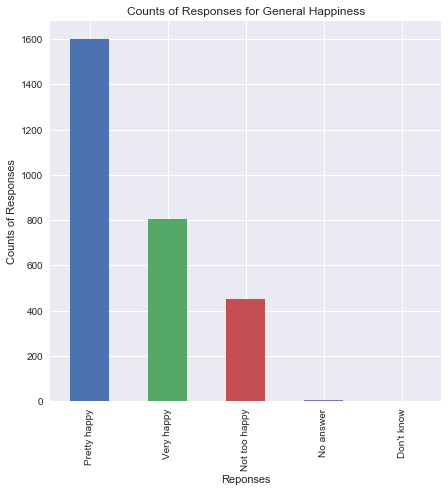

In [351]:
plt.figure(figsize = (7,7))
gen_happiness = data['general_happiness'].value_counts().plot(kind='bar')
plt.title("Counts of Responses for General Happiness")
plt.xlabel("Reponses")
plt.ylabel("Counts of Responses")

#### Examining `Hours of Internet use on Weekdays`:

Next, we examine the `Hours of internet use on weekdays` and note that 1630 respondents said that the question was _Not applicable_ to them. This must imply that they did not use the internet at all. This causes some discrepancy with the responses as 150 respondents said that they used the internet for _0_ hours. This confusion could be due to the wording of the answer options available to the respondents. Had _Not Applicable_ not been on the list of possile responses, 1630 might have answered with a _0_. It could also be possible that they did not have any access to the internet but for 2016, that seems very unlikely that the majority would not have internet access. So for the purpose of simplicity, _Not applicable_ gets grouped with _0_. 

In [352]:
internet_weekdays = data['internet_hrs_weekdays'].value_counts()
internet_weekdays

Not applicable    1630
1                  341
2                  250
0                  150
3                  130
4                   83
5                   64
6                   52
8                   41
10                  30
12                  22
7                   14
9                   12
No answer           10
15                   9
24                   8
Don't know           7
20                   4
14                   4
13                   3
11                   2
16                   1
Name: internet_hrs_weekdays, dtype: int64

In [353]:
data

,google,pinterest,flickr,vine,clssmtes,internet_hrs_weekdays,whatsapp,tumblr,general_happiness,marriage_happiness,present_happiness,happy_unhappy,twitter,facebook,instagram,linkedin,snapchat,internet_hrs_weekends
0,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
1,No,No,No,No,No,Not applicable,No,No,Pretty happy,Not applicable,Not applicable,Not applicable,No,No,No,No,No,Not applicable
2,No,No,No,No,No,Not applicable,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,No,No,No,Not applicable
3,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
4,Yes,No,No,No,No,1,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,Yes,Yes,Yes,1
5,No,No,No,No,No,1,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,Yes,No,No,0
6,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
7,No,No,No,No,No,2,Yes,No,Very happy,Very happy,Not applicable,Not applicable,No,Yes,Yes,No,Yes,3
8,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Pretty happy,Pretty happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
9,No,No,No,No,No,6,No,No,Pretty happy,Not applicable,Not applicable,Not applicable,No,Yes,No,No,No,5


After adding _Not applicable_ and _0_ together, we see from the table below that 1630 people out of the interviewed 2867 people did not use the internet at all. This is very interesting for a 2016 survey as 56% claim to use no internet during the weekdays. Next, 341 people used internet for an hour but only 1 person used it for over 16 hours.

In [354]:
data['internet_hrs_weekdays'].replace('Not applicable', 0, inplace=True)
hours_weekdays = data['internet_hrs_weekdays'].value_counts()
hours_weekdays

0             1630
1              341
2              250
0              150
3              130
4               83
5               64
6               52
8               41
10              30
12              22
7               14
9               12
No answer       10
15               9
24               8
Don't know       7
20               4
14               4
13               3
11               2
16               1
Name: internet_hrs_weekdays, dtype: int64

In [355]:
data

,google,pinterest,flickr,vine,clssmtes,internet_hrs_weekdays,whatsapp,tumblr,general_happiness,marriage_happiness,present_happiness,happy_unhappy,twitter,facebook,instagram,linkedin,snapchat,internet_hrs_weekends
0,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
1,No,No,No,No,No,0,No,No,Pretty happy,Not applicable,Not applicable,Not applicable,No,No,No,No,No,Not applicable
2,No,No,No,No,No,0,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,No,No,No,Not applicable
3,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
4,Yes,No,No,No,No,1,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,Yes,Yes,Yes,1
5,No,No,No,No,No,1,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,Yes,No,No,0
6,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
7,No,No,No,No,No,2,Yes,No,Very happy,Very happy,Not applicable,Not applicable,No,Yes,Yes,No,Yes,3
8,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0,Not applicable,Not applicable,Pretty happy,Pretty happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
9,No,No,No,No,No,6,No,No,Pretty happy,Not applicable,Not applicable,Not applicable,No,Yes,No,No,No,5


Text(0,0.5,'Counts of Hours of internet use on weekdays')

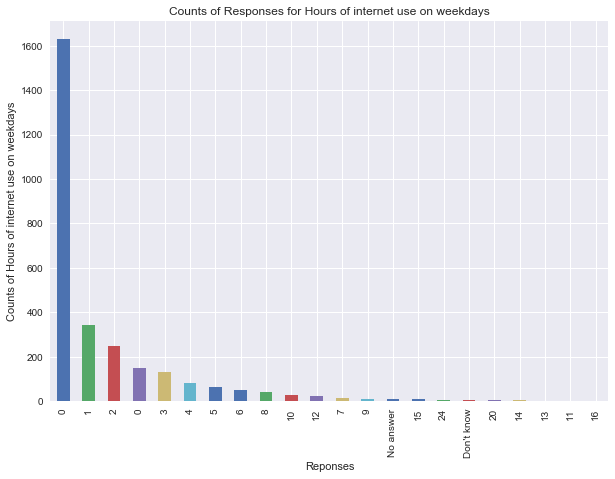

In [356]:
plt.figure(figsize = (10,7))
gen_happiness = data['internet_hrs_weekdays'].value_counts().plot(kind='bar')
plt.title("Counts of Responses for Hours of internet use on weekdays")
plt.xlabel("Reponses")
plt.ylabel("Counts of Hours of internet use on weekdays")

#### Examining `Hours of Internet use on Weekends`:

In [357]:
data['internet_hrs_weekends'].replace('Not applicable', 0, inplace=True)
internet_weekends = data['internet_hrs_weekends'].value_counts()
internet_weekends

0             1630
1              329
2              241
0              189
3              136
4              115
5               61
6               39
10              24
12              22
8               20
No answer       11
Don't know      10
7                8
24               7
20               7
15               6
14               6
13               3
9                2
18               1
Name: internet_hrs_weekends, dtype: int64

Text(0,0.5,'Counts of Hours of internet use on weekends')

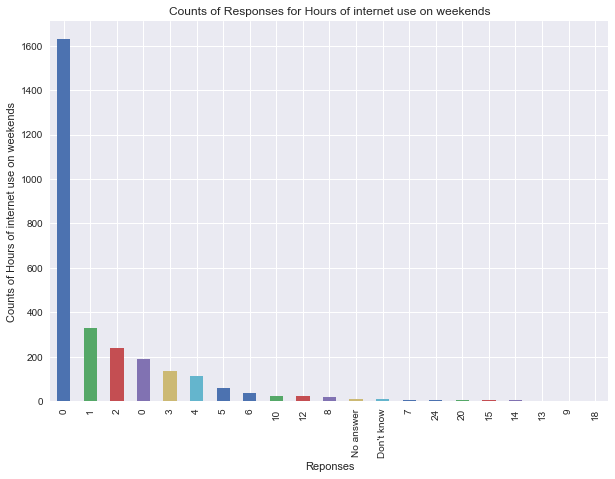

In [358]:
plt.figure(figsize = (10,7))
gen_happiness = data['internet_hrs_weekends'].value_counts().plot(kind='bar')
plt.title("Counts of Responses for Hours of internet use on weekends")
plt.xlabel("Reponses")
plt.ylabel("Counts of Hours of internet use on weekends")

In [359]:
data.head()

,google,pinterest,flickr,vine,clssmtes,internet_hrs_weekdays,whatsapp,tumblr,general_happiness,marriage_happiness,present_happiness,happy_unhappy,twitter,facebook,instagram,linkedin,snapchat,internet_hrs_weekends
0,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0
1,No,No,No,No,No,0,No,No,Pretty happy,Not applicable,Not applicable,Not applicable,No,No,No,No,No,0
2,No,No,No,No,No,0,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,No,No,No,0
3,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0,Not applicable,Not applicable,Pretty happy,Very happy,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,0
4,Yes,No,No,No,No,1,No,No,Very happy,Very happy,Not applicable,Not applicable,No,No,Yes,Yes,Yes,1


## The Happiness Model

The aim of this project is to see how happiness depends on the use of the social media/internet.
First, we can compare how happiness is affected by the `HOurs of internet use on weekdays`


\begin{aligned}
happiness_i = \beta_0 + \beta_1X_i + \beta_2internetonweekdays + e_i
\end{aligned}

In [363]:
print(pd.get_dummies(data['general_happiness']))

      Don't know  No answer  Not too happy  Pretty happy  Very happy
0              0          0              0             1           0
1              0          0              0             1           0
2              0          0              0             0           1
3              0          0              0             1           0
4              0          0              0             0           1
5              0          0              0             0           1
6              0          0              0             1           0
7              0          0              0             0           1
8              0          0              0             1           0
9              0          0              0             1           0
10             1          0              0             0           0
11             0          0              1             0           0
12             0          0              0             0           1
13             0          0       

In [368]:
# from patsy.builtins import *
# happiness_model = ols("internet_hrs_weekdays ~ Q('Don't know') + Q('No answer') + Q('Not too happy') + Q('Pretty happy') + Q('Very happy')", data=data).fit()
# happiness_model = happiness_model.summary()
# happiness_model_summary

happiness_model = ols("internet_hrs_weekdays ~ {0}".format('Don\'t know')
                      , data = data).fit()

PatsyError: error tokenizing input (maybe an unclosed string?)
    internet_hrs_weekdays ~ Don't know
                               ^

In [370]:
s = "Don't know"
s

"Don't know"

## References
https://worlddatabaseofhappiness.eur.nl/hap_bib/freetexts/magnus_k_1991.pdf

https://link.springer.com/journal/10902

https://ac.els-cdn.com/S1877042814057371/1-s2.0-S1877042814057371-main.pdf?_tid=7451ee27-f066-4f64-9ae7-6999505099ed&acdnat=1522891230_af0554a68d3b762db02e10a5e48eaa3f

http://gss.norc.org/About-The-GSS

http://gss.norc.org/Documents/reports/topical-reports/TR14.pdf